Coath, Christopher D., Robert CJ Steele, and W. Fred Lunnon. "Statistical bias in isotope ratios." Journal of Analytical Atomic Spectrometry 28.1 (2013): 52-58.

https://stats.stackexchange.com/questions/10951/what-is-the-distribution-of-the-ratio-of-two-poisson-random-variables

$\frac{X}{Y+1}$ has the expectation value of $(\lambda_1/\lambda_2)(1-\exp{-\lambda_2})$  NOT CONVINCED THIS IS TRUE

In [68]:
import pymc3 as pm
import numpy as np
import seaborn as nsn
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [69]:
rate1 = 15
rate2 = rate1/11
print(rate1, rate2, rate1/rate2, (rate1/rate2)*(1-np.exp(-rate2)))
d1 = np.random.poisson(rate1, size=1000)
d2 = np.random.poisson(rate2, size=1000)


15 1.3636363636363635 11.0 8.186979240955893


In [80]:
with pm.Model() as model1:
    r = pm.Uniform('rate', 0, 100, shape=2)
    p  = pm.Poisson('data', r, shape=2, observed=np.vstack((d1, d2)).T)
    ratio = pm.Deterministic('ratio', r[0]/(r[1]+1))
    sum1 = pm.Deterministic('sum1', pm.math.sum(r[0]))
    sum2 = pm.Deterministic('sum2', pm.math.sum(r[1]))

    start = pm.find_MAP()
    trace1 = pm.sample(10000, start=start, njobs=5)

logp = -4,291.2, ||grad|| = 2.565e-06: 100%|██████████| 12/12 [00:00<00:00, 1865.66it/s]  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/balarsen/miniconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (5 chains in 5 jobs)
NUTS: [rate_interval__]
100%|██████████| 10500/10500 [00:10<00:00, 1024.62it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113d37a90>,
      dtype=object)

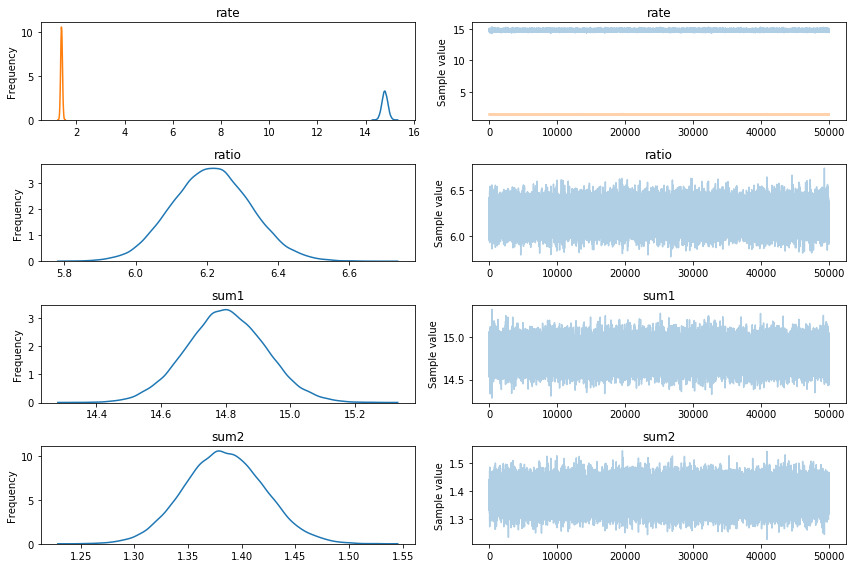

In [81]:
pm.traceplot(trace1, combined=True)

In [82]:
pm.summary(trace1)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
rate__0,14.798581,0.121712,0.000576,14.561327,15.041364,50000.0,1.000056
rate__1,1.383237,0.037288,0.000148,1.310939,1.456894,50000.0,0.999968
ratio,6.210959,0.109472,0.000473,5.993945,6.421136,50000.0,0.999976
sum1,14.798581,0.121712,0.000576,14.561327,15.041364,50000.0,1.000056
sum2,1.383237,0.037288,0.000148,1.310939,1.456894,50000.0,0.999968


In [83]:
(trace1['rate'][:,0].mean(), 
 trace1['rate'][:,1].mean(), 
 (trace1['rate'][:,0].mean()/trace1['rate'][:,1].mean()), 
 (1-np.exp(-trace1['rate'][:,1].mean())), 
(trace1['rate'][:,0].mean()/trace1['rate'][:,1].mean()) * (1-np.exp(-trace1['rate'][:,1].mean())) )


(14.798580511406922,
 1.3832373317031792,
 10.69851150791704,
 0.7492345732759196,
 8.015694704321739)

/Users/balarsen/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


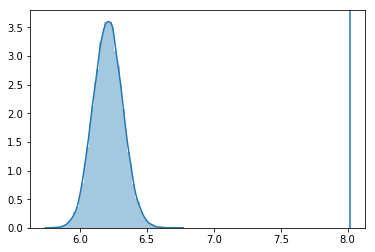

In [84]:
sns.distplot(trace1['ratio'])
plt.axvline(  (trace1['rate'][:,0].mean()/trace1['rate'][:,1].mean()) * (1-np.exp(-trace1['rate'][:,1].mean())) )

/Users/balarsen/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


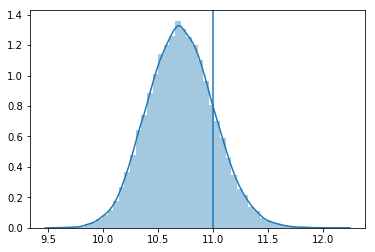

In [85]:
sns.distplot(trace1['sum1']/trace1['sum2'])
plt.axvline(11)

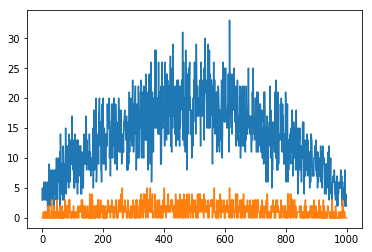

In [6]:
rate1 = 15*np.sin(np.linspace(0, np.pi, 1000))+4
rate2 = rate1/11
d1 = scipy.random.poisson(rate1)
d2 = scipy.random.poisson(rate2)
plt.plot(d1)
plt.plot(d2)

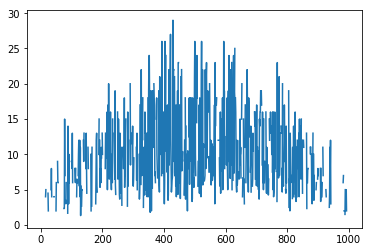

In [7]:
plt.plot(d1/d2)

(array([20., 36., 86., 95., 59., 76., 46., 64., 37., 17., 46., 19., 41.,
         7.,  7., 18.,  6.,  6.,  1.,  1.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ,
        16.4, 17.8, 19.2, 20.6, 22. , 23.4, 24.8, 26.2, 27.6, 29. ]),
 <a list of 20 Patch objects>)

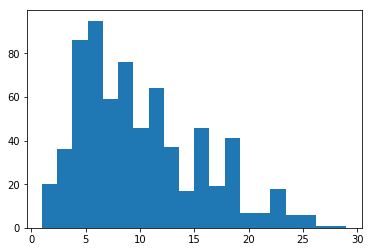

In [8]:
plt.hist((d1/d2)[np.isfinite(d1/d2)], 20)

In [87]:
with pm.Model() as model2:
    r1 = pm.Uniform('rate1', 0, 100, shape=len(d1))
    r2 = pm.Uniform('rate2', 0, 100, shape=len(d2))    
    p1  = pm.Poisson('data1', r1, shape=len(d1), observed=d1)
    p2  = pm.Poisson('data2', r2, shape=len(d2), observed=d2)
    ratio = pm.Deterministic('ratio', r1/(r2+1))
    sum1 = pm.Deterministic('sum1', pm.math.sum(r1))
    sum2 = pm.Deterministic('sum2', pm.math.sum(r2))

    start = pm.find_MAP()
    trace2 = pm.sample(10000, start=start, njobs=5)

logp = -12,361, ||grad|| = 0.03406: 100%|██████████| 49/49 [00:00<00:00, 1114.22it/s]  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/balarsen/miniconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (5 chains in 5 jobs)
NUTS: [rate2_interval__, rate1_interval__]
100%|██████████| 10500/10500 [01:13<00:00, 142.99it/s]


In [88]:
pm.summary(trace2, varnames=['ratio'])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
ratio__0,5.963010,2.962315,0.011623,1.211042,11.773512,44797.0,0.999967
ratio__1,5.949422,2.956897,0.011780,1.159451,11.717227,50000.0,1.000025
ratio__2,4.432831,2.365179,0.011870,0.825138,9.124040,41733.0,0.999963
ratio__3,3.263896,1.557333,0.006787,0.951528,6.365638,42172.0,1.000008
ratio__4,7.271029,3.617559,0.019456,1.727042,14.525479,39814.0,0.999961
ratio__5,6.470389,3.282151,0.015550,1.510771,13.084846,39143.0,0.999957
ratio__6,8.478160,4.137771,0.021298,2.190019,16.889750,39805.0,0.999998
ratio__7,8.094944,3.969028,0.018746,2.122146,16.232836,41717.0,0.999990
ratio__8,6.567837,3.221529,0.014017,1.320111,12.830520,50000.0,0.999967
ratio__9,7.681356,3.793134,0.018816,1.883729,15.362071,37210.0,1.000000


/Users/balarsen/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


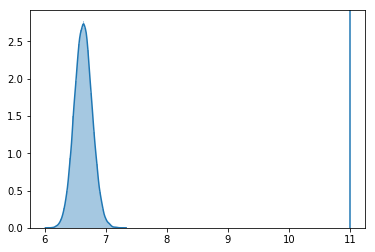

In [90]:
sns.distplot(trace2['sum1'].flatten()/trace2['sum2'].flatten())
plt.axvline(11)